# Import Required Libraries and Environment
Import Stable Baselines3, the custom PVPokeEnv, and other required libraries. Configure environment variables and connect to the server.

In [ ]:
import asyncio
import websockets
from pydantic import BaseModel
import nest_asyncio
nest_asyncio.apply()
import json
from ClassPVPOKE import PVPokeEnv
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

# Create an instance of the environment and connect to the server
env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
env.loop.run_until_complete(env.connect())

# Check if the environment follows the Gym API
check_env(env)

# Close the environment connection
env.close()

Connected to the server.
Sending message: reset
Sending message: reset
Sending message: reset
WebSocket connection closed.


# Create and Configure the Agent PPO
Create and configure a Stable Baselines3 agent (like PPO or DQN) with appropriate hyperparameters for the PVPoke environment.

In [ ]:
import asyncio
import nest_asyncio
nest_asyncio.apply()
from ClassPVPOKE import PVPokeEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback

env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
env.loop.run_until_complete(env.connect())

model = PPO(
    policy="MlpPolicy",
    env=env,
    learning_rate=3e-4,
    n_steps=128,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,
    vf_coef=0.5,
    max_grad_norm=0.5,
    tensorboard_log="./ppo_pvpoke_tensorboard/mandibuzz-Annihilape",
    policy_kwargs={"net_arch": [128, 128]}  
)

# Guardar checkpoints regularmente
checkpoint_callback = CheckpointCallback(
    save_freq=5000, 
    save_path='./models/ppo/mandibuzz-Annihilape', 
    name_prefix='ppo_pvpoke_1v1'
)

# Entrenar con los parámetros ajustados
model.learn(total_timesteps=200000, callback=checkpoint_callback, progress_bar=True)

# Guardar el modelo final
model.save("ppo_pvpoke_final_mandibuzz-Annihilape")

# Close the environment connection
env.close()

Connected to the server.


Output()

In [ ]:
# Import required libraries
import asyncio
import websockets
from pydantic import BaseModel
import nest_asyncio
nest_asyncio.apply()
import json
from ClassPVPOKE import PVPokeEnv
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

# Crear y conectar el entorno
env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
env.loop.run_until_complete(env.connect())



# ✅ Crear el modelo DQN con la red personalizada
model = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-3,              # Aprendizaje ajustado para 1v1
    buffer_size=50000,               # Tamaño de buffer aumentado para estabilidad
    learning_starts=1000,            # Más pasos antes de comenzar el aprendizaje
    batch_size=128,                  # Tamaño de batch ideal para 1v1
    gamma=0.99,                      # Factor de descuento a largo plazo
    train_freq=4,                    # Actualización cada 4 pasos
    gradient_steps=1,                # Un paso de gradiente por actualización
    target_update_interval=1000,     # Actualización del target más frecuente
    exploration_fraction=0.1,        
    exploration_initial_eps=1.0,     
    exploration_final_eps=0.05,      
    tensorboard_log="./dqn_pvpoke_tensorboard/mandibuzz-Annihilape",
    policy_kwargs={"net_arch": [128, 128]}  # ✅ Especificando la red de 128-128
)

# ✅ Callback para guardar checkpoints cada 5000 steps
checkpoint_callback = CheckpointCallback(
    save_freq=5000, 
    save_path='./models/dqn/mandibuzz-Annihilape', 
    name_prefix='dqn_pvpoke'
)

# ✅ Entrenar el modelo con los nuevos ajustes
model.learn(total_timesteps=200000, callback=checkpoint_callback, progress_bar=True)

# ✅ Guardar el modelo final
model.save("dqn_pvpoke_final_mandibuzz-Annihilape")

# Cerrar el entorno al finalizar
env.close()


Connected to the server.


Output()

# Entrenar DQN


In [ ]:
# Import required libraries
import asyncio
import websockets
from pydantic import BaseModel
import nest_asyncio
nest_asyncio.apply()
import json
from ClassPVPOKE import PVPokeEnv
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

# Create and connect environment
env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
env.loop.run_until_complete(env.connect())

# Create DQN agent with appropriate hyperparameters
model = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-3,  # Aumentar la tasa de aprendizaje
    buffer_size=50000,  # Reducir el tamaño del buffer
    learning_starts=100,  # Reducir el número de pasos antes de empezar a aprender
    batch_size=128,  # Reducir el tamaño del batch
    gamma=0.99,
    train_freq=4,
    gradient_steps=1,
    target_update_interval=1000,  # Reducir el intervalo de actualización del objetivo
    exploration_fraction=0.1,
    exploration_initial_eps=1,
    exploration_final_eps=0.05,    
    tensorboard_log="./dqn_pvpoke_tensorboard/3v3/Skar-TA-SA-BRB-Swampert-MS-HC-SW-Umbreon-SN-LR-FP-Trev-SC-SeB-SD-Vigp-Co-BS-RS-Dewgong-Is-IW-DR"
)
# Create checkpoint callback
checkpoint_callback = CheckpointCallback(save_freq=5000, 
                                         save_path='./models/dqn/3v3/Skar-TA-SA-BRB-Swampert-MS-HC-SW-Umbreon-SN-LR-FP-Trev-SC-SeB-SD-Vigp-Co-BS-RS-Dewgong-Is-IW-DR"',
                                         name_prefix='dqn_pvpoke')

# Train the agent
model.learn(total_timesteps = 200000, callback=checkpoint_callback, progress_bar=False)

# Save final model
model.save("dqn_pvpoke_final_Skar-TA-SA-BRB-Swampert-MS-HC-SW-Umbreon-SN-LR-FP-Trev-SC-SeB-SD-Vigp-Co-BS-RS-Dewgong-Is-IW-DR")

env.close()

Connected to the server.


OSError: [WinError 123] El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos: './models/dqn/Skar-TA-SA-BRB-Swampert-MS-HC-SW-Umbreon-SN-LR-FP-Trev-SC-SeB-SD-Vigp-Co-BS-RS-Dewgong-Is-IW-DR"'

# Probar el agente en un episodio.

Connected to the server.
Loaded model from C:\pvpokeDRL\pvpoke\PVPOKE\dqn_pvpoke_final_mantine-gligar.zip

Episode 1 started
Initial observation: [  0. 122.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   0. 130.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.]

Action taken: 0
Observation: [  8. 119.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.   8. 127.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   2.]
Reward: -0

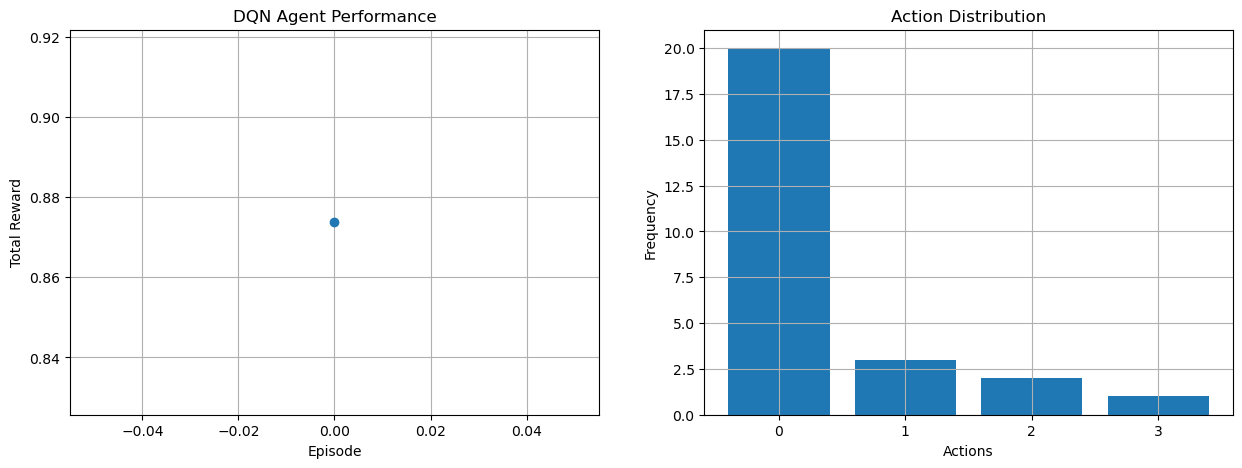

WebSocket connection closed.


In [ ]:
import asyncio
import websockets
import json
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback
import numpy as np
from ClassPVPOKE import PVPokeEnv
from stable_baselines3 import DQN
import matplotlib.pyplot as plt
import nest_asyncio 
nest_asyncio.apply()


# Create and connect environment
env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
env.loop.run_until_complete(env.connect())

# Load pre-trained model
model_path = "C:\pvpokeDRL\pvpoke\PVPOKE\dqn_pvpoke_final_mantine-gligar.zip"
model = DQN.load(model_path)

#model_path  = "C:\pvpokeDRL\pvpoke\PVPOKE\models\ppo\mandibuzz-Annihilape\ppo_pvpoke_1v1_140000_steps.zip"
#model = PPO.load(model_path)
print(f"Loaded model from {model_path}")

# Test model performance with debugging
rewards = []
actions_taken = []
observations = []

for episode in range(1):
    obs, info = env.reset()
    print(f"\nEpisode {episode + 1} started")
    print(f"Initial observation: {obs}")
    
    
    done = False
    total_reward = 0
    episode_actions = []
    
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        episode_actions.append(action)
        print(f"\nAction taken: {action}")
        
        obs, reward, done, terminated, info = env.step(action)
        print(f"Observation: {obs}")
        print(f"Reward: {reward}")
        
        total_reward += reward
        observations.append(obs)
    
    print(f"\nEpisode finished with total reward: {total_reward}")
    print(f"Actions taken in episode: {episode_actions}")
    rewards.append(total_reward)
    actions_taken.extend(episode_actions)

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards, marker='o')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('DQN Agent Performance')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(actions_taken, bins=np.arange(env.action_space.n + 1) - 0.5, align="mid", rwidth=0.8)
plt.xticks(np.arange(env.action_space.n))
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.grid(True)
plt.show()

# Close environment
env.close()

In [ ]:
import asyncio
import numpy as np
from stable_baselines3 import DQN
from ClassPVPOKE import PVPokeEnv

# Create environment
env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
env.loop.run_until_complete(env.connect())

# Print environment specs
print("Environment Specifications:")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")

# Load model and print architecture
model_path = "dqn_pvpoke_final_mantine-gligar_optuna"
try:
    model = DQN.load(model_path, env=env)
    print("\nModel Architecture:")
    print(model.policy)
except Exception as e:
    print(f"Error loading model: {e}")

# Test single prediction
try:
    obs, _ = env.reset()
    print("\nTest Prediction:")
    print(f"Observation shape: {obs.shape}")
    action, _states = model.predict(obs, deterministic=True)
    print(f"Predicted action: {action}")
except Exception as e:
    print(f"Error during prediction: {e}")

env.close()

Connected to the server.
Environment Specifications:
Observation Space: Box(0.0, 255.0, (8,), float32)
Action Space: Discrete(4)

Model Architecture:
DQNPolicy(
  (q_net): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
    )
  )
)
Sending message: reset

Test Prediction:
Observation shape: (8,)
Predicted act

# OPTUNA

In [ ]:
import optuna
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
import asyncio
import websockets
from pydantic import BaseModel
import nest_asyncio
nest_asyncio.apply()
import json
from ClassPVPOKE import PVPokeEnv

# Define the objective function
def objective(trial):
    # Define the hyperparameter search space
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    buffer_size = trial.suggest_int('buffer_size', 10000, 100000)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256])
    gamma = trial.suggest_uniform('gamma', 0.9, 0.999)
    exploration_fraction = trial.suggest_uniform('exploration_fraction', 0.1, 0.5)
    exploration_final_eps = trial.suggest_uniform('exploration_final_eps', 0.01, 0.1)
    
    # Create and connect environment
    env = PVPokeEnv("ws://localhost:8000/ws", "notebook", "pvpoke")
    env.loop.run_until_complete(env.connect())
    
    # Create the DQN model
    model = DQN(
        "MlpPolicy",
        env,
        learning_rate=learning_rate,
        buffer_size=buffer_size,
        learning_starts=500,
        batch_size=batch_size,
        gamma=gamma,
        train_freq=4,
        gradient_steps=1,
        target_update_interval=500,
        exploration_fraction=exploration_fraction,
        exploration_initial_eps=1.0,
        exploration_final_eps=exploration_final_eps,
        tensorboard_log="./dqn_pvpoke_tensorboard/"
    )
    
    # Create evaluation callback
    eval_callback = EvalCallback(env, best_model_save_path='./logs/',
                                 log_path='./logs/', eval_freq=500,
                                 deterministic=True, render=False)
    
    # Train the model
    model.learn(total_timesteps=10000, callback=eval_callback)
    
    # Evaluate the model
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)
    
    # Close the environment
    env.close()
    
    return mean_reward

# Create the study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

[I 2024-12-28 11:51:52,284] A new study created in memory with name: no-name-cf637b24-c188-4629-bac1-95c458b508dd
C:\Users\samue\AppData\Local\Temp\ipykernel_31864\890825868.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
C:\Users\samue\AppData\Local\Temp\ipykernel_31864\890825868.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  gamma = trial.suggest_uniform('gamma', 0.9, 0.999)
C:\Users\samue\AppData\Local\Temp\ipykernel_31864\890825868.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

Connected to the server.
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset


c:\Users\samue\miniconda3\envs\gym\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Eval num_timesteps=500, episode_reward=-133.00 +/- 0.00
Episode length: 46.00 +/- 0.00
New best mean reward!
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Eval num_timesteps=1000, episode_reward=-73.60 +/- 7.68
Episode length: 35.80 +/- 1.47
New best mean reward!
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset


[I 2024-12-28 13:35:13,096] Trial 0 finished with value: -102.0 and parameters: {'learning_rate': 0.0007484760104390964, 'buffer_size': 34306, 'batch_size': 256, 'gamma': 0.9536373641947591, 'exploration_fraction': 0.3608392572521345, 'exploration_final_eps': 0.08839072268939926}. Best is trial 0 with value: -102.0.


WebSocket connection closed.
Connected to the server.
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Eval num_timesteps=500, episode_reward=-133.00 +/- 0.00
Episode length: 46.00 +/- 0.00
New best mean reward!
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending m

[I 2024-12-28 15:09:40,186] Trial 1 finished with value: -88.9 and parameters: {'learning_rate': 9.301996110892225e-05, 'buffer_size': 80607, 'batch_size': 32, 'gamma': 0.9713104497888039, 'exploration_fraction': 0.45181342894106047, 'exploration_final_eps': 0.07901715989387353}. Best is trial 1 with value: -88.9.


WebSocket connection closed.
Connected to the server.
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Eval num_timesteps=500, episode_reward=-82.00 +/- 0.00
Episode length: 20.00 +/- 0.00
New best mean reward!
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending me

[I 2024-12-28 16:38:21,748] Trial 2 finished with value: -133.0 and parameters: {'learning_rate': 0.0005002020345389054, 'buffer_size': 47961, 'batch_size': 256, 'gamma': 0.9748084210129654, 'exploration_fraction': 0.281023740501287, 'exploration_final_eps': 0.05193648699760344}. Best is trial 1 with value: -88.9.


WebSocket connection closed.
Connected to the server.
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Eval num_timesteps=500, episode_reward=-133.00 +/- 0.00
Episode length: 33.00 +/- 0.00
New best mean reward!
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending m

[I 2024-12-28 18:20:11,287] Trial 3 finished with value: -106.0 and parameters: {'learning_rate': 0.00010056170468402817, 'buffer_size': 55247, 'batch_size': 32, 'gamma': 0.9955249082006237, 'exploration_fraction': 0.20645174081023848, 'exploration_final_eps': 0.08701723354861225}. Best is trial 1 with value: -88.9.


WebSocket connection closed.
Connected to the server.
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Eval num_timesteps=500, episode_reward=-133.00 +/- 0.00
Episode length: 46.00 +/- 0.00
New best mean reward!
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending message: reset
Sending m

[I 2024-12-28 20:03:57,849] Trial 4 finished with value: -48.0 and parameters: {'learning_rate': 3.2243775007763094e-05, 'buffer_size': 23335, 'batch_size': 32, 'gamma': 0.9425402178303517, 'exploration_fraction': 0.27687288025671425, 'exploration_final_eps': 0.012090955143464824}. Best is trial 4 with value: -48.0.


WebSocket connection closed.
Best hyperparameters:  {'learning_rate': 3.2243775007763094e-05, 'buffer_size': 23335, 'batch_size': 32, 'gamma': 0.9425402178303517, 'exploration_fraction': 0.27687288025671425, 'exploration_final_eps': 0.012090955143464824}
